<a href="https://colab.research.google.com/github/yvishyst/songstolisten/blob/master/songstolisten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [2]:
data = files.upload()

Saving Top_1_000_Songs_To_Hear_Before_You_Die.csv to Top_1_000_Songs_To_Hear_Before_You_Die.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import top 1000 songs to hear before you die from socrata.com
data_df = pd.read_csv("/content/Top_1_000_Songs_To_Hear_Before_You_Die.csv")

In [4]:
print(data_df.shape)
data_df.head(),data_df.tail()
#As the top is clean, there is no requirement of cleaning

(994, 5)


(  THEME  ...                                        SPOTIFY_URL
 0  Love  ...  http://open.spotify.com/track/78j3qTBdzcIiT3eS...
 1  Love  ...  http://open.spotify.com/track/2PojSoZ94AIzp7fs...
 2  Love  ...  http://open.spotify.com/track/0ObrXLrfrqJUNc8R...
 3  Love  ...  http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...
 4  Love  ...  http://open.spotify.com/track/0cx32rX0uZvcJUP9...
 
 [5 rows x 5 columns],
            THEME  ...                                        SPOTIFY_URL
 989  Party songs  ...                                                NaN
 990  Party songs  ...  http://open.spotify.com/track/4kxrawSkeAoJiASQ...
 991  Party songs  ...  http://open.spotify.com/track/6zMgWeJracgip80Y...
 992  Party songs  ...                                                NaN
 993  Party songs  ...  http://open.spotify.com/track/2kXBmTMIDIlNSQEe...
 
 [5 rows x 5 columns])

In [5]:
data_df.isnull().sum()

THEME            0
TITLE            0
ARTIST           0
YEAR             0
SPOTIFY_URL    222
dtype: int64

In [6]:
data_df.dtypes

THEME          object
TITLE          object
ARTIST         object
YEAR            int64
SPOTIFY_URL    object
dtype: object

In [0]:
#Converting theme, title and artist to string columns
data_df[['THEME','TITLE','ARTIST']]=data_df[['THEME','TITLE','ARTIST']].astype('str')

In [8]:
data_df.describe()

,YEAR
count,994.000000
mean,1978.058350
std,15.616006
min,1916.000000
25%,1968.000000
50%,1977.000000
75%,1988.000000
max,2008.000000


In [9]:
data_df[data_df.YEAR==1968].count()

THEME          39
TITLE          39
ARTIST         39
YEAR           39
SPOTIFY_URL    29
dtype: int64

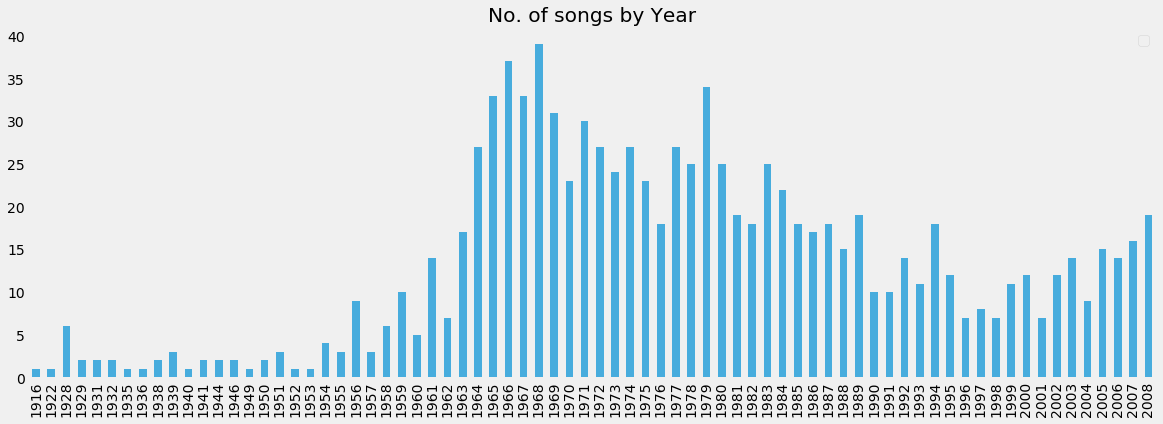

In [66]:
#Plotting Number of songs per year
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6),clear=True)
ax = fig.subplots()
data_df['YEAR'].value_counts().reset_index().sort_values('index').plot(kind='bar',x='index',y='YEAR',ax=ax,alpha=0.7)
ax.set_title("No. of songs by Year");
#ax.set(alpha=0.9,facecolor='grey')
ax.legend("")
ax.set_xlabel("")
ax.grid(False)

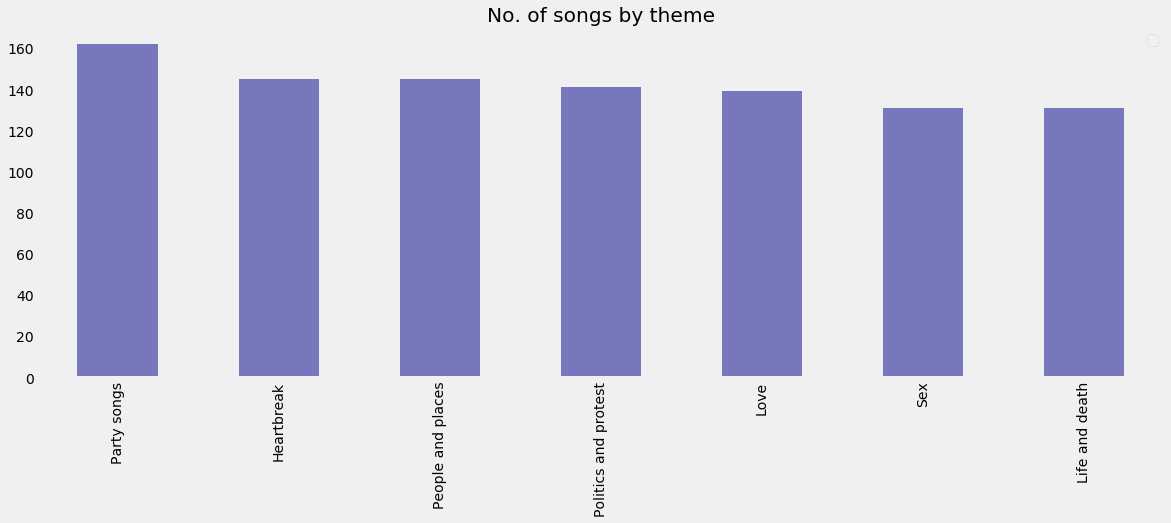

In [67]:
#Plotting Number of themes per year
fig = plt.figure(figsize=(18,6),clear=True)
ax = fig.subplots()
data_df['THEME'].value_counts().plot(kind='bar',ax=ax,color='darkblue',alpha=0.5)
ax.set_title("No. of songs by theme");
ax.legend("")
ax.set_xlabel("")
ax.grid(False)

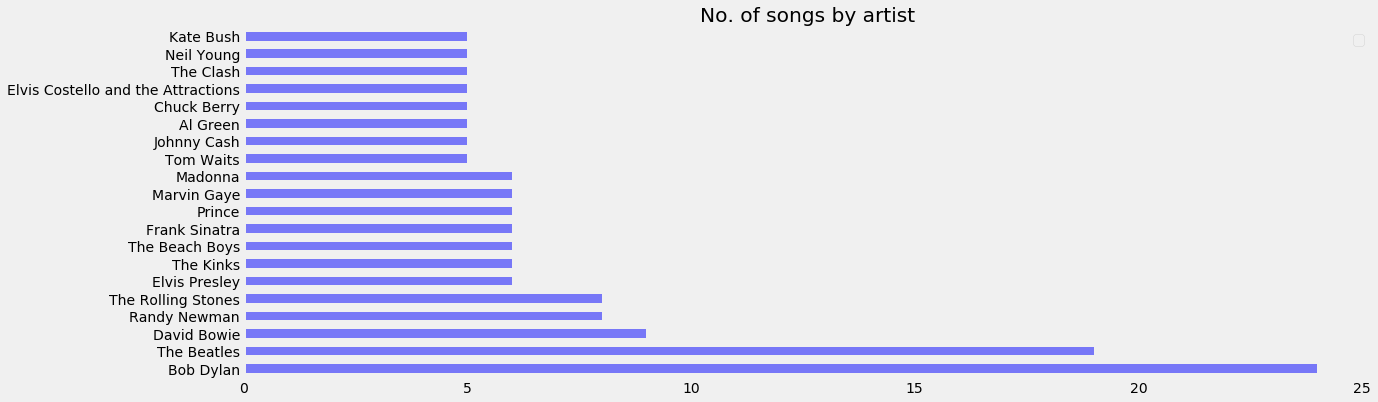

In [69]:
#Plotting Top 20 artists per songs
fig = plt.figure(figsize=(18,6),clear=True)
ax = fig.subplots()
data_df['ARTIST'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh',ax=ax,color='blue',alpha=0.5)
ax.set_title("No. of songs by artist");
ax.legend("")
ax.set_xlabel("")
ax.grid(False)


In [60]:
data_df.ARTIST.nunique()

670

In [61]:
decades = [year for year in range(1919,2019,10)]
decades

[1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009]

In [62]:
decade_year = pd.cut(data_df['YEAR'],decades)
theme_decade = pd.crosstab(decade_year,data_df['THEME'],normalize='index')
theme_decade

THEME,Heartbreak,Life and death,Love,Party songs,People and places,Politics and protest,Sex
YEAR,,,,,,,
"(1919, 1929]",0.000000,0.222222,0.111111,0.000000,0.333333,0.222222,0.111111
"(1929, 1939]",0.090909,0.090909,0.090909,0.090909,0.363636,0.272727,0.000000
"(1939, 1949]",0.000000,0.250000,0.000000,0.125000,0.500000,0.125000,0.000000
"(1949, 1959]",0.095238,0.166667,0.261905,0.023810,0.357143,0.000000,0.095238
"(1959, 1969]",0.148148,0.106996,0.218107,0.061728,0.213992,0.135802,0.115226
"(1969, 1979]",0.143411,0.127907,0.162791,0.213178,0.108527,0.139535,0.104651
"(1979, 1989]",0.122449,0.096939,0.061224,0.239796,0.117347,0.188776,0.173469
"(1989, 1999]",0.185185,0.212963,0.092593,0.166667,0.055556,0.083333,0.203704
"(1999, 2009]",0.194915,0.152542,0.076271,0.203390,0.076271,0.169492,0.127119


Text(0.5, 0, '')

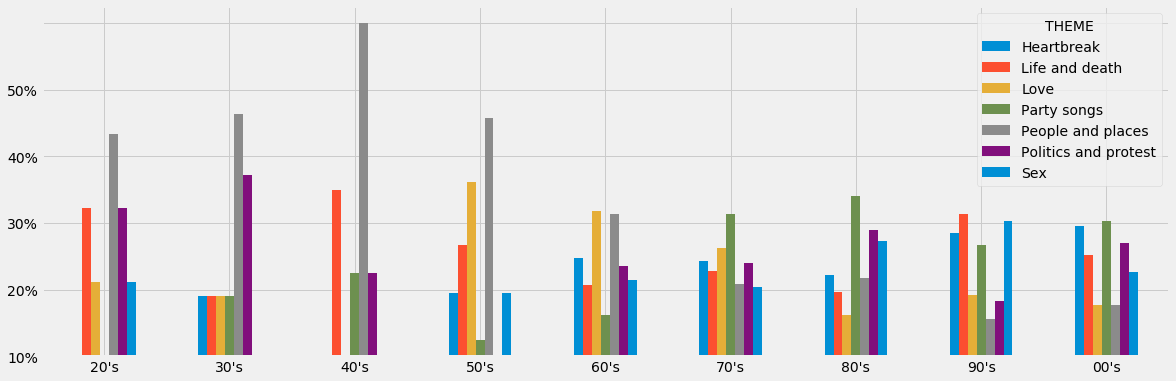

In [64]:
fig = plt.figure(figsize=(18,6),clear=True)
ax = fig.subplots()
theme_decade.plot(kind='bar',ax=ax);
ax.set_xticklabels(labels=["20's","30's","40's","50's","60's","70's","80's","90's","00's","10's"],rotation=0)
ax.set_yticklabels(labels=["10%","20%","30%","40%","50%"],rotation=0)
ax.set_xlabel("")
